
# Clustering en la práctica: **K-Means** y **DBSCAN**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors


## Datasets sintéticos a usar

- **Blobs**: clusters esféricos
- **Medias lunas**: clusters no convexos
- **Círculos concéntricos**: forma no convexa + densidades variables


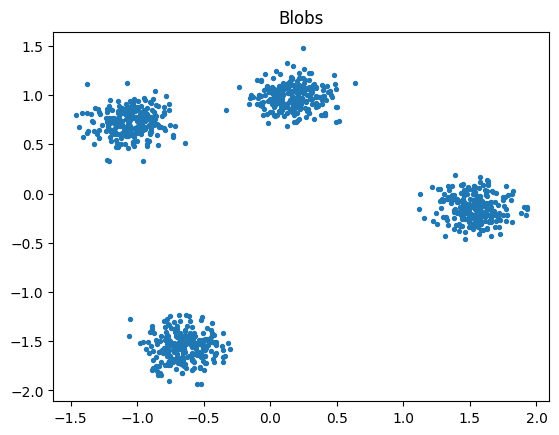

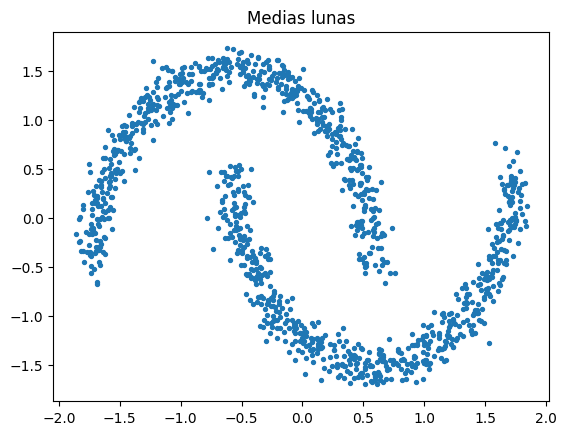

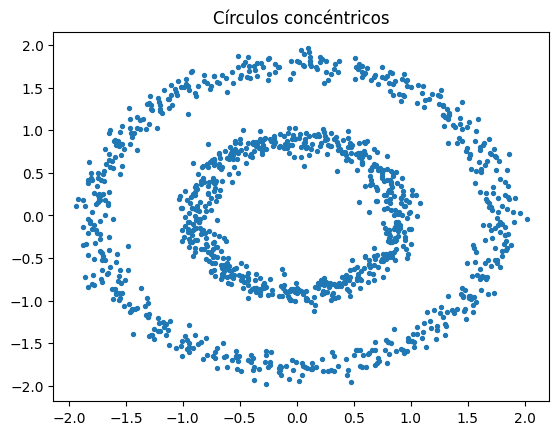

In [ ]:
X_blobs, _ = make_blobs(n_samples=1000, centers=4, cluster_std=0.80, random_state=42)
X_moons, _ = make_moons(n_samples=1200, noise=0.06, random_state=42)
X_circles, _ = make_circles(n_samples=1200, factor=0.5, noise=0.05, random_state=42)

scaler = StandardScaler()
X_blobs_s = scaler.fit_transform(X_blobs)
X_moons_s = scaler.fit_transform(X_moons)
X_circles_s = scaler.fit_transform(X_circles)

fig = plt.figure()
plt.scatter(X_blobs_s[:,0], X_blobs_s[:,1], s=8)
plt.title("Blobs")
plt.show()

fig = plt.figure()
plt.scatter(X_moons_s[:,0], X_moons_s[:,1], s=8)
plt.title("Medias lunas")
plt.show()

fig = plt.figure()
plt.scatter(X_circles_s[:,0], X_circles_s[:,1], s=8)
plt.title("Círculos concéntricos")
plt.show()


## K-Means: funcionamiento básico en blobs

Entrenamos K-Means con \(k=4\) (sabemos que los blobs tienen 4 clusteres)

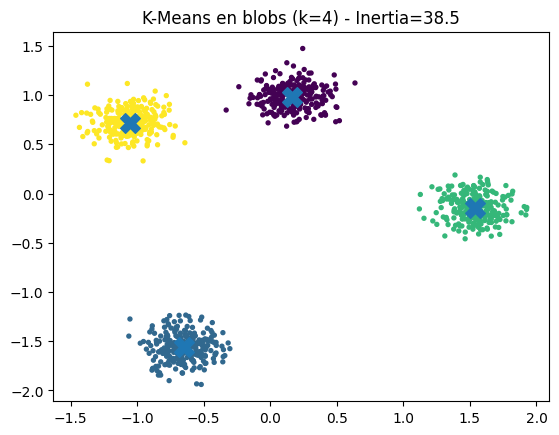

In [ ]:
k = 4
km = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = km.fit_predict(X_blobs_s)
centers = km.cluster_centers_
inertia = km.inertia_

fig = plt.figure()
plt.scatter(X_blobs_s[:,0], X_blobs_s[:,1], s=8, c=labels)
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200)
plt.title(f"K-Means en blobs (k={k}) - Inertia={inertia:.1f}")
plt.show()


### Método del codo (Elbow)

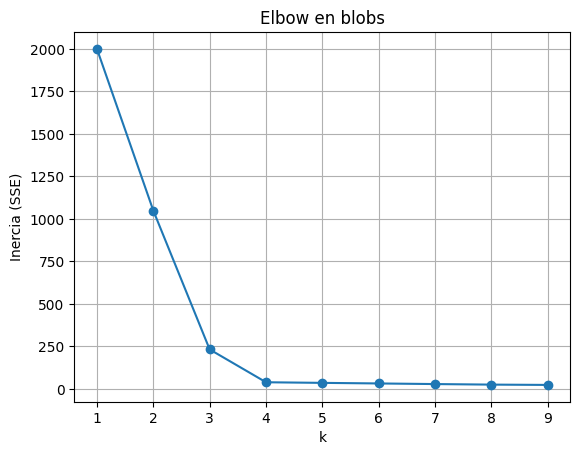

In [ ]:
k_list = range(1, 10)
inertias = []

for k in k_list:
    km_ = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_blobs_s)
    inertias.append(km_.inertia_)

fig = plt.figure()
plt.plot(list(k_list), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inercia (SSE)")
plt.title("Elbow en blobs")
plt.grid(True)
plt.show()


### 3.2 ¿Qué pasa si aplicamos K-Means a formas no convexas?


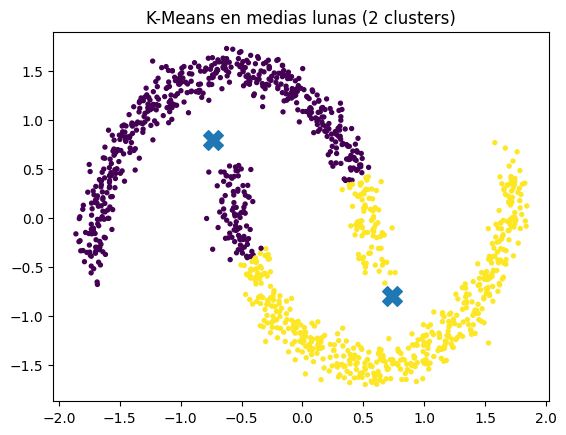

In [ ]:
km_moons = KMeans(n_clusters=2, n_init=10, random_state=42)
labels_moons = km_moons.fit_predict(X_moons_s)
centers_moons = km_moons.cluster_centers_

fig = plt.figure()
plt.scatter(X_moons_s[:,0], X_moons_s[:,1], s=8, c=labels_moons)
plt.scatter(centers_moons[:,0], centers_moons[:,1], marker='X', s=200)
plt.title("K-Means en medias lunas (2 clusters)")
plt.show()


## DBSCAN: k-dist plot y clustering en formas no convexas


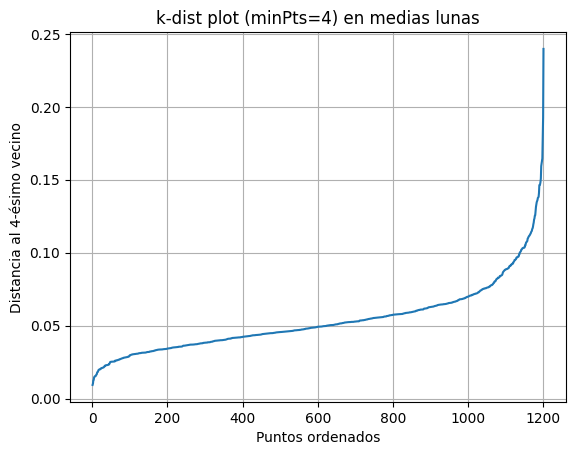

In [ ]:
minPts = 4
nn = NearestNeighbors(n_neighbors=minPts).fit(X_moons_s)
dists, _ = nn.kneighbors(X_moons_s)
k_dists = np.sort(dists[:, -1])

fig = plt.figure()
plt.plot(np.arange(1, len(k_dists)+1), k_dists)
plt.xlabel("Puntos ordenados")
plt.ylabel(f"Distancia al {minPts}-ésimo vecino")
plt.title(f"k-dist plot (minPts={minPts}) en medias lunas")
plt.grid(True)
plt.show()

Ejecutamos DBSCAN con `eps` "al ojo"


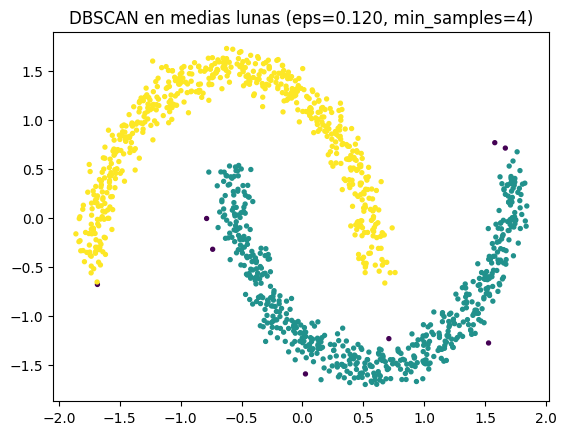

{np.int64(-1): np.int64(8),
 np.int64(0): np.int64(593),
 np.int64(1): np.int64(599)}

In [ ]:
eps = 0.12
db = DBSCAN(eps=eps, min_samples=minPts)
labels_db = db.fit_predict(X_moons_s)

fig = plt.figure()
plt.scatter(X_moons_s[:,0], X_moons_s[:,1], s=8, c=labels_db)
plt.title(f"DBSCAN en medias lunas (eps={eps:.3f}, min_samples={minPts})")
plt.show()

# Puntos por clase
unique, counts = np.unique(labels_db, return_counts=True)
summary = dict(zip(unique, counts))
summary



### Explorando parámetros en DBSCAN

Probaremos distintos `eps` y `min_samples` para ver cómo cambian clusters y ruido.


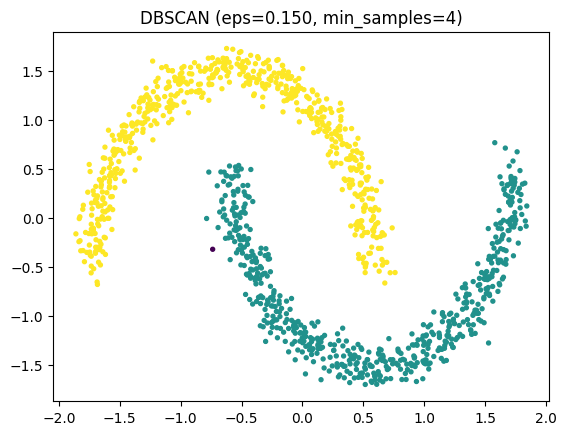

Clusters: {np.int64(-1): np.int64(1), np.int64(0): np.int64(599), np.int64(1): np.int64(600)}


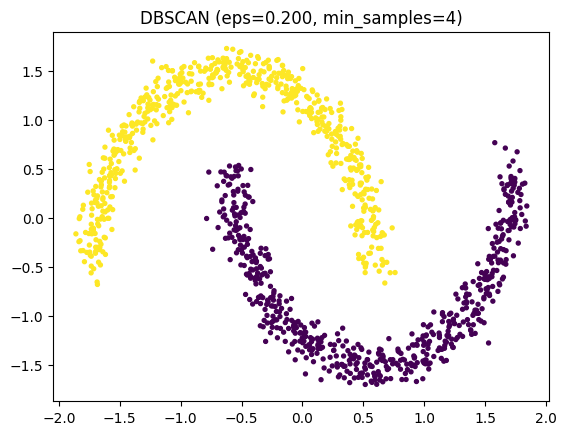

Clusters: {np.int64(0): np.int64(600), np.int64(1): np.int64(600)}


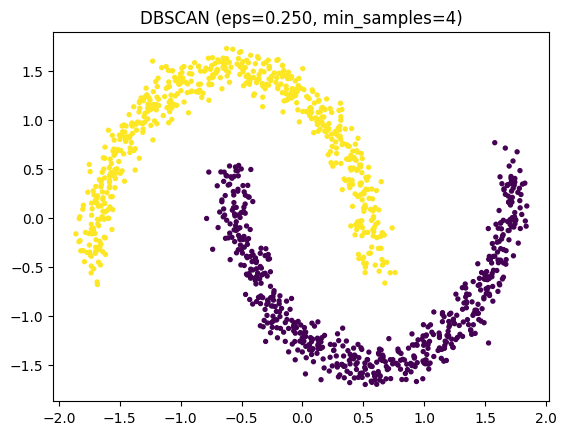

Clusters: {np.int64(0): np.int64(600), np.int64(1): np.int64(600)}


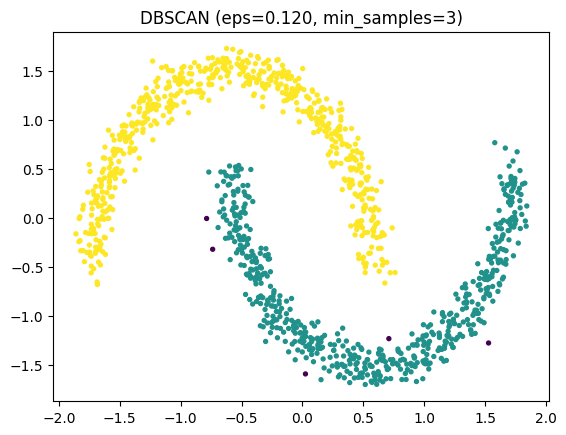

Clusters: {np.int64(-1): np.int64(5), np.int64(0): np.int64(595), np.int64(1): np.int64(600)}


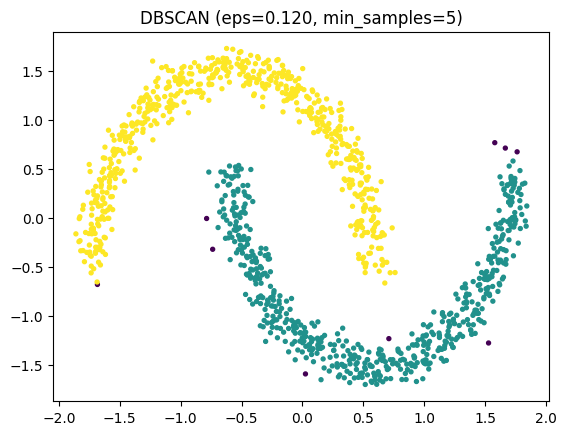

Clusters: {np.int64(-1): np.int64(9), np.int64(0): np.int64(592), np.int64(1): np.int64(599)}


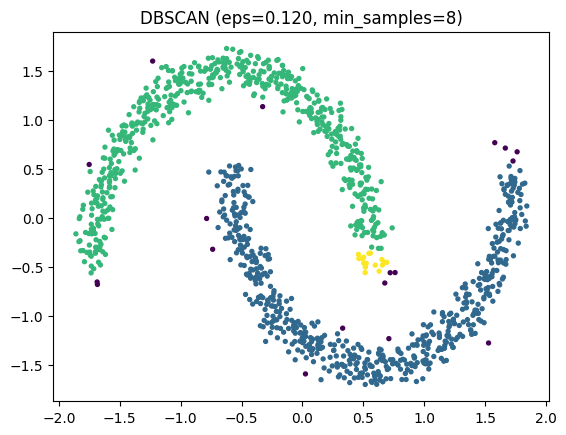

Clusters: {np.int64(-1): np.int64(18), np.int64(0): np.int64(590), np.int64(1): np.int64(575), np.int64(2): np.int64(17)}


In [ ]:
def experimentos_dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_
    fig = plt.figure()
    plt.scatter(X[:,0], X[:,1], s=8, c=labels)
    plt.title(f"DBSCAN (eps={eps:.3f}, min_samples={min_samples})")
    plt.show()
    _, counts = np.unique(labels, return_counts=True)
    print("Clusters:", dict(zip(*np.unique(labels, return_counts=True))))

for eps_try in [0.15, 0.20, 0.25]:
    experimentos_dbscan(X_moons_s, eps=eps_try, min_samples=4)

eps = 0.12
for ms in [3, 5, 8]:
    experimentos_dbscan(X_moons_s, eps=eps, min_samples=ms)


### DBSCAN en círculos concéntricos


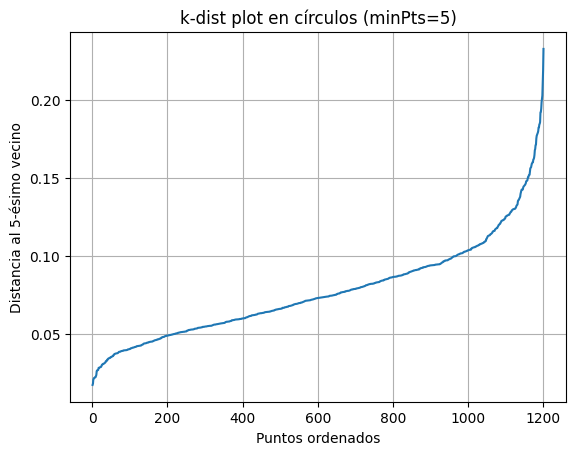

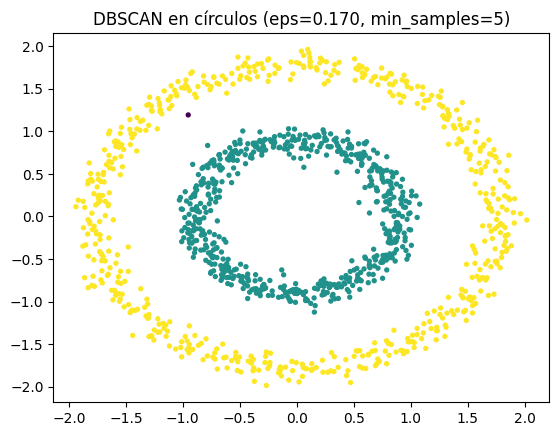

In [ ]:
minPts = 5
nn_c = NearestNeighbors(n_neighbors=minPts).fit(X_circles_s)
d_c, _ = nn_c.kneighbors(X_circles_s)
k_d_c = np.sort(d_c[:, -1])

fig = plt.figure()
plt.plot(np.arange(1, len(k_d_c)+1), k_d_c)
plt.xlabel("Puntos ordenados")
plt.ylabel(f"Distancia al {minPts}-ésimo vecino")
plt.title(f"k-dist plot en círculos (minPts={minPts})")
plt.grid(True)
plt.show()

eps_c = 0.17 # ojo
db_c = DBSCAN(eps=eps_c, min_samples=minPts).fit(X_circles_s)
labels_c = db_c.labels_

fig = plt.figure()
plt.scatter(X_circles_s[:,0], X_circles_s[:,1], s=8, c=labels_c)
plt.title(f"DBSCAN en círculos (eps={eps_c:.3f}, min_samples={minPts})")
plt.show()

# Actividad
Vamos a aplicar los modelos de clustering K-Means y DBSCAN a 4 datasets sintéticos:

* Aplique K-Means para los 4 datasets utilizando el método del codo para encontrar el mejor `k`
* Aplique DBSCAN para los 4 datasets utilizando k-dist para estimar el valor de `eps`. Van a ser `eps` distintos para cada dataset
* Continuando con DBSCAN, para el mejor `eps` encontrado en el punto anterior (por cada dataset), repita el experimento con el mejor `eps` fijo (se mantiene) pero cambiando el `minpts` entre `[4, 6, 8]`
* Comente los resultados obtenidos entre los modelos.
* Cuanto termine, me avisa para marcarlo como logrado.
* Pueden trabajar de a dos o tres.

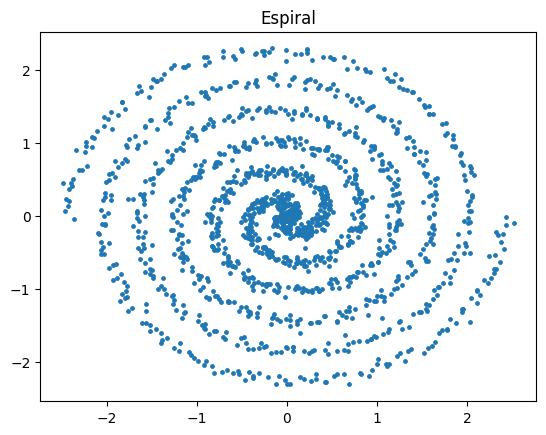

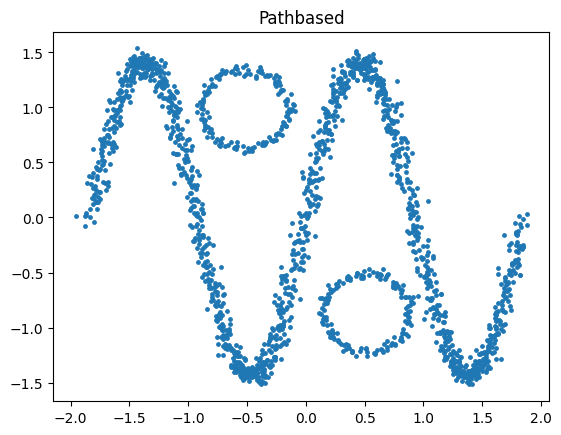

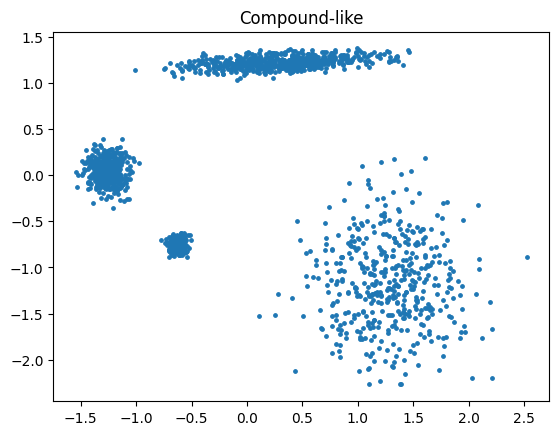

In [ ]:
def make_spiral(n_samples=1500, noise=0.02, arms=2, rotations=3.0):
    n_per_arm = n_samples // arms
    X = []
    for a in range(arms):
        t = np.linspace(0, rotations * 2*np.pi, n_per_arm) + (a * np.pi)
        r = np.linspace(0.0, 1.0, n_per_arm)
        x = r * np.cos(t) + noise*np.random.randn(n_per_arm)
        y = r * np.sin(t) + noise*np.random.randn(n_per_arm)
        X.append(np.c_[x, y])
    return np.vstack(X)

def make_pathbased(n_samples=1500, noise=0.03):
    t = np.linspace(0, 4*np.pi, n_samples)
    x = t/ (4*np.pi) * 2.5
    y = np.sin(t)
    X = np.c_[x, y] + noise*np.random.randn(n_samples, 2)
    m = n_samples // 10
    t2 = np.linspace(0, 2*np.pi, m)
    branch1 = np.c_[0.9 + 0.25*np.cos(t2), 0.7 + 0.25*np.sin(t2)] + noise*np.random.randn(m,2)*0.5
    branch2 = np.c_[1.6 + 0.25*np.cos(t2), -0.6 + 0.25*np.sin(t2)] + noise*np.random.randn(m,2)*0.5
    return np.vstack([X, branch1, branch2])

def make_compound_like(n_samples=1800, noise=0.02):
    g1 = 0.15*np.random.randn(n_samples//4, 2) + np.array([0.0, 0.0])
    base = 0.25*np.random.randn(n_samples//3, 2)
    A = np.array([[2.5, 0.0],[1.2, 0.3]])
    g2 = base @ A + np.array([2.5, 1.5])
    g3 = 0.6*np.random.randn(n_samples//4, 2) + np.array([4.0, -1.5])
    g4 = 0.07*np.random.randn(n_samples - (len(g1)+len(g2)+len(g3)), 2) + np.array([1.0, -1.0])
    X = np.vstack([g1, g2, g3, g4])
    X += noise*np.random.randn(*X.shape)
    return X

X_spiral = StandardScaler().fit_transform(make_spiral())
X_path   = StandardScaler().fit_transform(make_pathbased())
X_comp   = StandardScaler().fit_transform(make_compound_like())

for name, X in [("Espiral", X_spiral), ("Pathbased", X_path), ("Compound-like", X_comp)]:
    fig = plt.figure()
    plt.scatter(X[:,0], X[:,1], s=6)
    plt.title(name)
    plt.show()
